## Red Wine Quality Analysis

**Introduction**

The wine industry relies heavily on consistent quality for consumer satisfaction and brand reputation. This project aims to analyze the Red Wine Quality dataset using data analysis and machine learning techniques to understand factors influencing wine quality. The analysis will focus on uncovering patterns in the physicochemical properties of the wine and their relationship to the sensory experience captured by the quality score.

**Data Description**

This analysis will utilize a dataset containing physicochemical (input) and sensory (output) variables for red wine. The input variables, likely containing measurements from various stages of wine production, include:

* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol

The output variable is the quality of the wine, represented by a score between 0 and 10. The source of the dataset will be acknowledged if available, and the data size (number of samples and features) will be mentioned.

**Data Loading and Preprocessing**

The data will be loaded using Pandas. Necessary preprocessing steps will be performed to ensure data quality and prepare it for analysis. These steps may include:

* Handling missing values: Techniques like mean/median imputation or removal will be chosen based on data characteristics.
* Scaling numerical features: To ensure all features contribute equally to the analysis, numerical features might be scaled using techniques like standardization or normalization. The specific method will be chosen based on the data distribution.


**Exploratory Data Analysis (EDA)**

A thorough EDA will be conducted to understand the data's characteristics and identify potential relationships between variables. This will involve creating various visualizations and conducting tests for anomalies. Specific areas of exploration include:

* **Univariate analysis:** Histograms and boxplots will be used to visualize the distributions of each variable and identify potential outliers.
* **Multivariate analysis:** Heatmaps will be used to visualize the correlation matrix, revealing relationships between all features. This can highlight potential redundancies or multicollinearity.

**Statistical Inference**

The target population (e.g., all types of red wines) will be defined. Based on the EDA findings, specific statistical hypotheses about the relationships between features and the target variable (quality) will be formulated. 

Specifically, we will be testing the correlation between alcohol content and wine quality, and between volatile acidity and wine quality. 

Confidence intervals will be constructed for relevant statistics, and significance levels will be set. 

Appropriate statistical tests, such as Pearson correlation coefficient for correlation tests, will be conducted to evaluate the formulated hypotheses.

**Machine Learning Models**

Linear regression models will be the primary focus to predict both the quality and alcohol content of the wine using the other 11 features. Ordinary least squares regression will be the initial model, and its performance will be analyzed using metrics like:

* Feature significance: P-values of coefficients will be used to identify features that significantly contribute to the prediction. Non-significant features might be removed to avoid overfitting.
* R-squared: This metric indicates how well the model explains the variance in the target variable.
* Adjusted R-squared: This penalizes models with too many features and provides a more reliable estimate of performance.
* Information criteria: Metrics like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) will be used to compare different model complexities and choose the one with the best balance of fit and parsimony.

Furthermore, the possibility of exploring non-linear models (e.g., decision trees, random forests) will be considered if the data suggests complex relationships. Regularization techniques like Ridge or Lasso regression might also be explored to handle potential issues with correlated features.

**Model Validation and Evaluation**

Cross-validation techniques will be used to validate the models and obtain a more robust estimate of their generalizability beyond the training data. The performance of the models will be evaluated using appropriate metrics like R-squared and mean squared error (MSE).

**Visualization**

A visually appealing and informative dashboard will be created using Looker Studio or another Business Intelligence (BI) tool. The dashboard will include at least three different chart types to effectively communicate the findings. Examples could include:

* Bar charts for feature distributions
* Scatter plots for correlations between features and target variables
* Line charts for model performance metrics

**Conclusion and Suggestions for Improvement**

The results of the analysis will be clearly explained, highlighting important insights gained about the relationship between physicochemical properties and wine quality.

# Data Loading and Preprocessing

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sqlite3
from functions import *
from scipy.stats import pearsonr
from statsmodels.stats.proportion import proportion_confint

In [59]:
wine_df = pd.read_csv('winequality-red.csv')
conn = sqlite3.connect('wine_quality.db')
wine_df.to_sql('wine_quality', conn, if_exists='replace', index=False)

1599

In [60]:
wine_df.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [61]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Great news, the data we are looking at does not have any missing entries.  There are 1,599 rows of data with 12 columns each. Everything is stored as numberic variables.  

Next up, we see if there are any duplicate entries in the data, if there are - get rid of them.


In [62]:
wine_df = remove_duplicates(wine_df)

Removed 240 duplicate rows


We can see that, there were 240 duplicates in the dataset, which have been removed, we can see that by the output of our dataframe, which now has 1,359 rows of data.

Now, we describe the data to get a better understanding of the distribution of the features.

In [63]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Those 12 columns represent the following features:



* **Fixed Acidity:** The average value is 8.31, the highest value is 15.9.
* **Volatile Acidity:** The average value is 0.529, the highest value is 1.58.
* **Citric Acid:** The average value is 0.272, the highest value is 1.00.
* **Residual Sugar:** The average value is 2.523, the highest value is 15.5.
* **Chlorides:** The average value is 0.088, the highest value is 0.611.
* **Free Sulfur Dioxide:** The average value is 15.89, the highest value is 72.00.
* **Total Sulfur Dioxide:** The average value is 46.82, the highest value is 289.00.
* **Density:** The average value is 0.996, the highest value is 1.004.
* **pH:** The average value is 3.3, the highest value is 4.01.
* **Sulphates:** The average value is 0.65, the highest value is 2.00.
* **Alcohol:** The average value is 10.43, the highest value is 14.90.
* **Quality:** The average value is 5.62, the highest value is 8.00.

Afterwards, we can rename the features to be able to use them more easily.


In [64]:
get_columns(wine_df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [65]:
wine_df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

After fixing the columns names, we can check for the outliers in the features itself.

# Exploratory Data Analysis

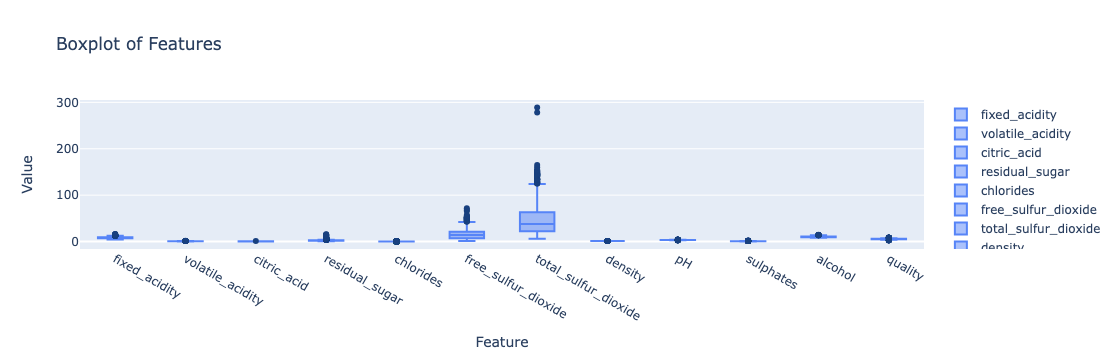

In [66]:
plot_box_chart(wine_df, "Feature", "Value", "Boxplot of Features")

The boxplot reveals noticeable outliers in features like "free sulfur dioxide" and "total sulfur dioxide." While other features may also have outliers, the IQR (Interquartile Range) can help us further confirm these existing outliers and identify potential ones in other features.

In [67]:
identify_outliers(wine_df)

fixed_acidity            41
volatile_acidity         19
citric_acid               1
residual_sugar          126
chlorides                87
free_sulfur_dioxide      26
total_sulfur_dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  12
quality                  27
dtype: int64

In our dataset, we have identified a total of 601 outliers across 12 features using the Interquartile Range (IQR) method. 

These outliers represent values that significantly deviate from the rest of the data. 

While outliers can sometimes indicate errors, they can also represent valid but extreme variations in the data. 

At this stage, without a deeper understanding of the context and nature of the data, we have chosen to temporarily retain these outliers in our analysis. 

This decision stems from the possibility that these outliers could provide valuable insights. 

However, we acknowledge that outliers can potentially skew our analysis and we will therefore revisit this decision as necessary during later stages of our analysis.

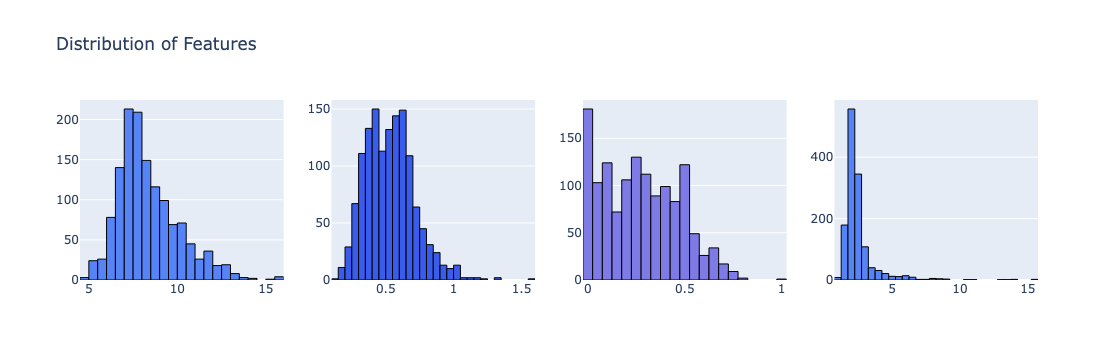

In [68]:
plot_histograms(wine_df, ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"])

**Fixed Acidity:** The distribution is right-skewed, indicating that most wines have a fixed acidity level around 7-8, with fewer wines having higher fixed acidity.
**Volatile Acidity:** The data is also right-skewed, showing that most wines have a volatile acidity around 0.5, with only a few wines having a volatile acidity above 1.
**Citric Acid:** This feature shows a bimodal distribution, indicating two groups of wines, one with low citric acid close to 0 and another with citric acid between 0.25 and 0.5.
**Residual Sugar:** The distribution is highly right-skewed, suggesting that most wines have low residual sugar levels, with a peak below five. Few wines have high residual sugar levels.

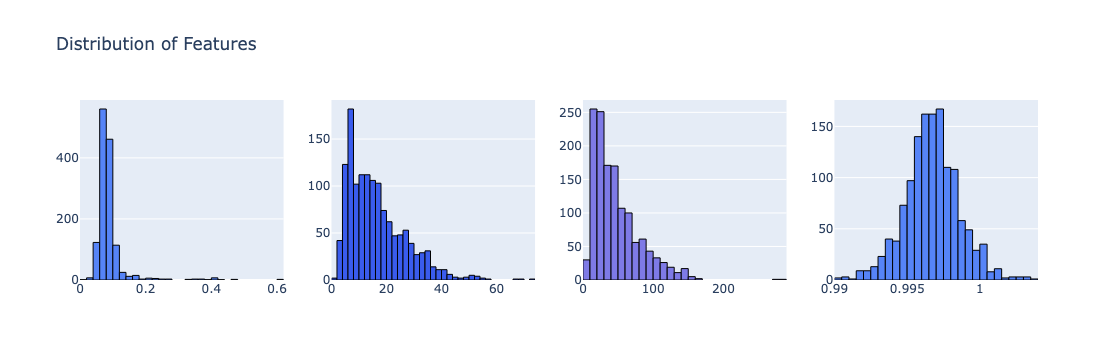

In [69]:
plot_histograms(wine_df, ["chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density"])

**Chlorides:** The distribution is right-skewed, indicating that most wines have a chloride level around 0.1, with fewer wines having higher chloride levels.
**Free Sulfur Dioxide:** The data is also right-skewed, showing that most wines have a free sulfur dioxide count around 10-20, with only a few wines having a count above 40.
**Total Sulfur Dioxide:** This feature shows a right-skewed distribution, indicating that most wines have a total sulfur dioxide count around 50, with fewer wines having a count above 100.
**Density:** The distribution is approximately normal, suggesting that most wines have a density around 1.0, with few wines having significantly higher or lower densities.

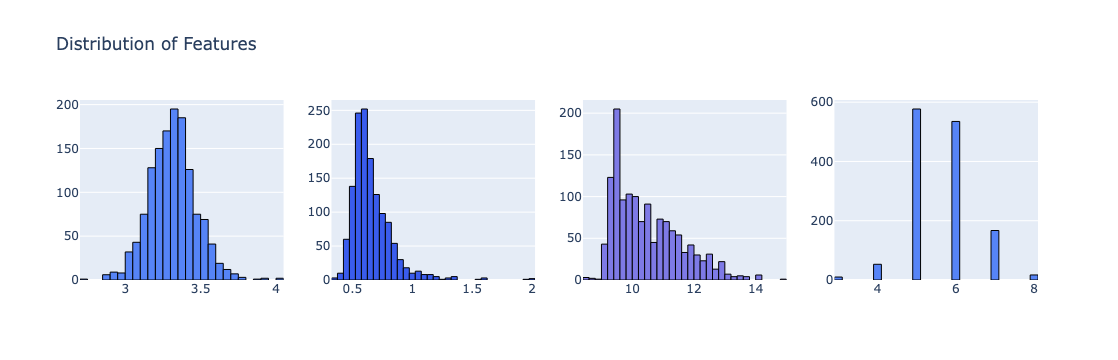

In [70]:
plot_histograms(wine_df, ["pH", "sulphates", "alcohol", "quality"])

**pH:** The distribution is approximately normal, indicating that most wines have a pH level around 3.2, with fewer wines having significantly higher or lower pH levels.
**Sulphates:** The data is right-skewed, showing that most wines have a sulphate level around 0.5, with only a few wines having a level above 1.
**Alcohol:** This feature shows a right-skewed distribution, indicating that most wines have an alcohol level around 9-10%, with fewer wines having a level above 13%.
**Quality:** The distribution is approximately normal, suggesting that most wines have a quality rating around 6, with few wines having significantly higher or lower ratings.


Our initial data exploration using histograms revealed that most features (fixed acidity, volatile acidity, etc.) exhibit right-skewed distributions, indicating a concentration of wines with values clustered around a central point. 

This pattern suggests that the majority of wines fall within a specific range for these features. In contrast, "density" and "pH" show distributions closer to normal, while "citric acid" has a unique bimodal distribution. 

Notably, "quality" itself appears to be normally distributed.  

These observations provide a foundation for further analysis, particularly investigating relationships between these features and wine quality to identify potential patterns and correlations.

In [71]:
corr_matrix = wine_df.corr()
print(corr_matrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.255124     0.667437   
volatile_acidity          -0.255124          1.000000    -0.551248   
citric_acid                0.667437         -0.551248     1.000000   
residual_sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free_sulfur_dioxide       -0.140580         -0.020945    -0.048004   
total_sulfur_dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

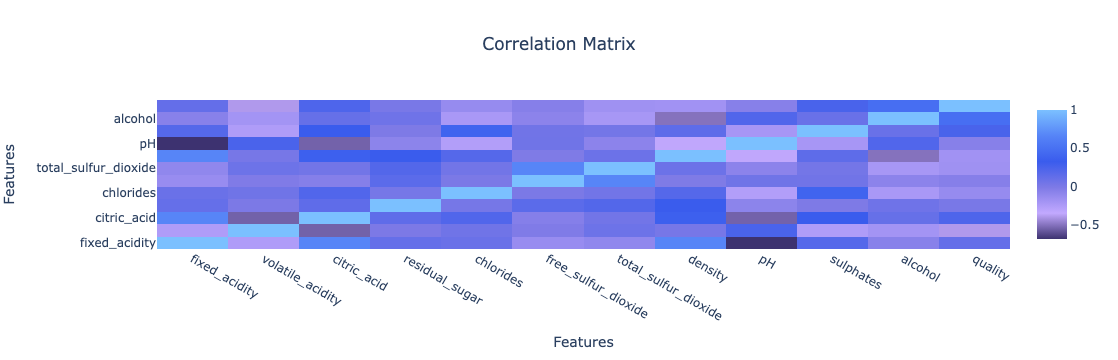

In [72]:
plot_heatmap(corr_matrix)

The correlation matrix provides a summary of how each feature in the dataset is related to every other feature. The values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation. Here are some key observations from the matrix:

1. `fixed_acidity` has a strong positive correlation with `citric_acid` and `density`, and a strong negative correlation with `pH`. This suggests that as fixed acidity increases, so do citric acid and density, while pH decreases.

2. `volatile_acidity` has a strong negative correlation with `quality`. This suggests that higher volatile acidity is associated with lower quality.

3. `citric_acid` has a strong positive correlation with `fixed_acidity` and a strong negative correlation with `pH`. This suggests that as citric acid increases, so does fixed acidity, while pH decreases.

4. `density` has a strong positive correlation with `fixed_acidity` and `citric_acid`, and a strong negative correlation with `alcohol`. This suggests that as density increases, so do fixed acidity and citric acid, while alcohol decreases.

5. `alcohol` has a strong positive correlation with `quality` and a strong negative correlation with `density`. This suggests that higher alcohol content is associated with higher quality and lower density.

6. `quality`, the target variable, has a strong positive correlation with `alcohol` and a strong negative correlation with `volatile_acidity`. This suggests that higher quality is associated with higher alcohol content and lower volatile acidity.

So, in the dataset, several features show strong correlations with each other, which could lead to multicollinearity in a regression model. Multicollinearity occurs when predictor variables are highly correlated, potentially making the model's estimates less reliable. For instance, `fixed_acidity` is highly correlated with `citric_acid` and `density`. Therefore, when building the model, it might be necessary to address multicollinearity to ensure the reliability of the model.

Furthermore, `alcohol` and `volatile_acidity` show strong correlations with `quality`, the target variable. `Alcohol` has a strong positive correlation with `quality`, suggesting that wines with higher alcohol content tend to have higher quality ratings. On the other hand, `volatile_acidity` has a strong negative correlation with `quality`, indicating that wines with higher volatile acidity tend to have lower quality ratings. These features could be significant predictors in the model for wine quality. However, the actual performance of these predictors should be validated through model training and evaluation.

With these findings in mind, we can move to the statistical inference.

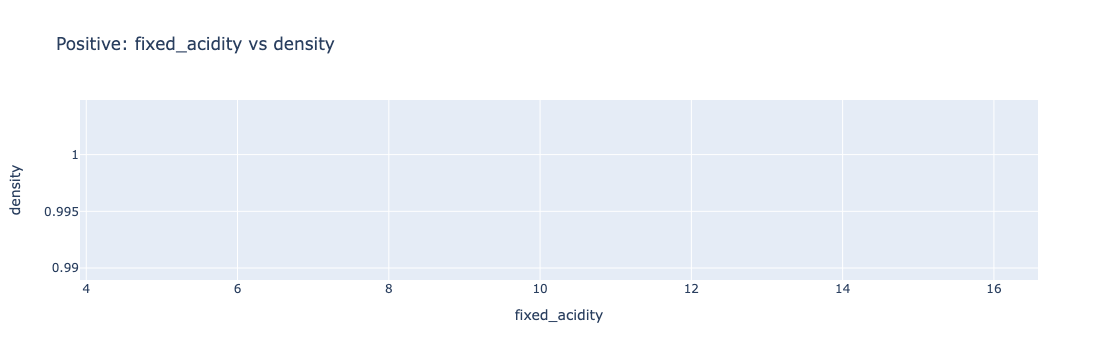

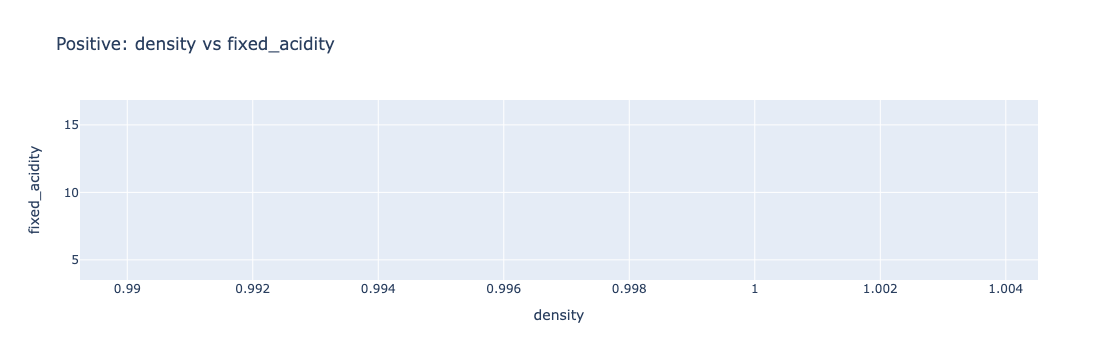

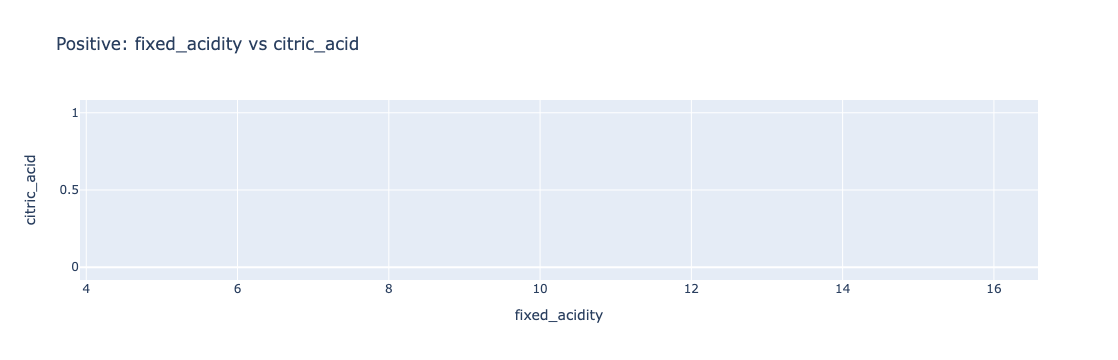

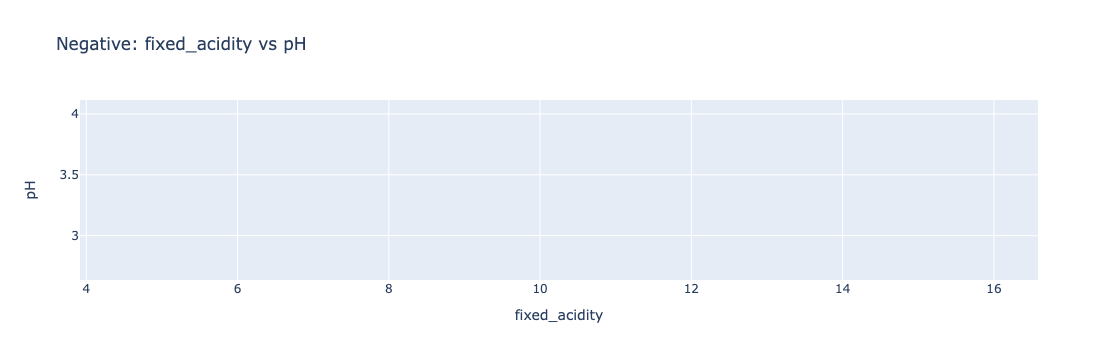

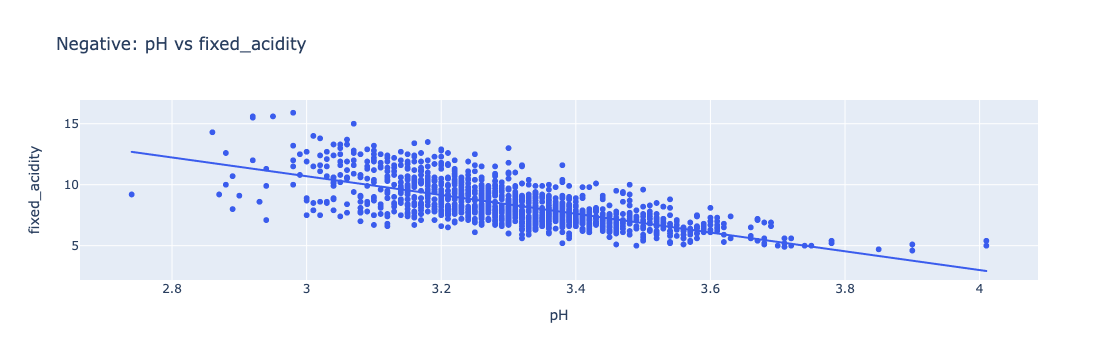

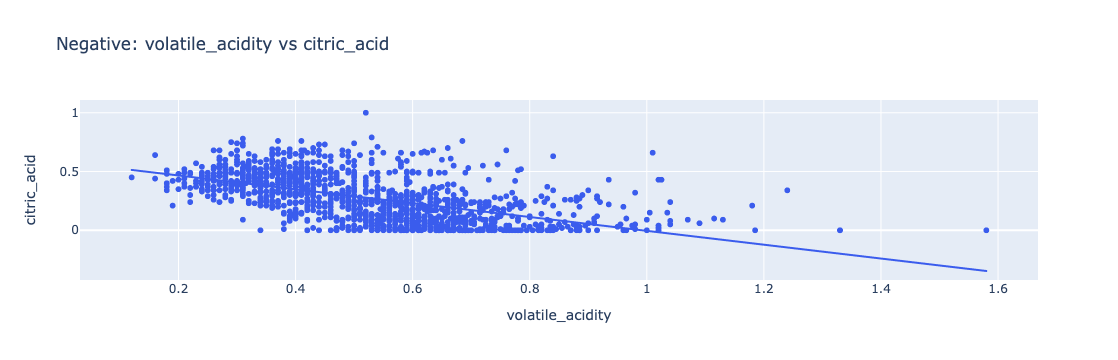

In [73]:
plot_top_correlations(wine_df, corr_matrix, 3)

From the scatterplots, we can observe a clear linear relationship between the pairs of variables. 

This linear relationship suggests that as one variable increases, the other variable also increases (or decreases) in a predictable manner. 

This is a crucial observation because it indicates that these pairs of variables could be good predictors for a machine learning model. 

Specifically, models that work well with linear relationships, such as logistic regression, could potentially benefit from these pairs of variables. 

However, further statistical analysis would be required to confirm the strength and significance of these relationships

# Statistical Inference

### Estimating Proportions of High and Low-Quality Wines

**Introduction:**

This section explores the distribution of wine quality within the dataset by estimating the proportions of high and low-quality wines. We'll define high-quality wines as those with a rating of 7 or higher and low-quality wines with a rating of 4 or lower. Confidence intervals will be constructed to quantify the uncertainty associated with these estimates.

**1. Proportion of High-Quality Wines**

We're interested in estimating the proportion of wines considered high-quality (rating 7 or higher) within the entire population (all wines).

**1.1 Estimating Proportion with Confidence Interval**

A confidence interval provides a range of values within which the true proportion of high-quality wines is likely to fall, with a specific level of confidence (usually 95% in this case).

In [74]:
df_high_quality = wine_df[wine_df['quality'] >= 7]
total_wines = wine_df.shape[0]
high_quality_wines = len(df_high_quality)

proportion_high_quality = high_quality_wines / total_wines

lower_bound, upper_bound = proportion_confint(high_quality_wines, total_wines)

print(f"\nEstimated Proportion of High-Quality Wines (95% CI): {proportion_high_quality:.4f} ({lower_bound:.4f} - {upper_bound:.4f})")


Estimated Proportion of High-Quality Wines (95% CI): 0.1354 (0.1172 - 0.1536)


There is inherent uncertainty when estimating a population parameter (like the true proportion of high-quality wines) from a sample (the dataset we have). 

The confidence interval helps us quantify this uncertainty. 

In this case, we can be 95% confident that the actual proportion of high-quality wines in the entire population of wines is somewhere between 11.72% and 15.36%.

**2. Proportion of Low-Quality Wines**

Similarly, we want to estimate the proportion of wines considered low-quality (rating 4 or lower).

**2.1 Estimating Proportion with Confidence Interval**

Following the same approach as for high-quality wines, we calculate the confidence interval for the proportion of low-quality wines.

In [75]:
df_low_quality = wine_df[wine_df['quality'] <= 4]
low_quality_wines = len(df_low_quality)

proportion_low_quality = low_quality_wines / total_wines

lower_bound, upper_bound = proportion_confint(low_quality_wines, total_wines)

print(f"\nEstimated Proportion of Low-Quality Wines (95% CI): {proportion_low_quality:.4f} ({lower_bound:.4f} - {upper_bound:.4f})")


Estimated Proportion of Low-Quality Wines (95% CI): 0.0464 (0.0352 - 0.0575)


Similar to the high-quality wines, there's uncertainty associated with the estimated proportion of low-quality wines. 

The confidence interval helps us quantify this. 

In this case, we can be 95% confident that the actual proportion of low-quality wines in the entire population of wines is somewhere between 3.52% and 5.75%.

## Citric Acid Content in High vs. Low Quality Wines
- **Population:** Random samples of high and low quality wines
- **Parameter of Interest:** Difference in mean citric acid value (μ1 − μ2)
  - μ1: Mean citric acid value of high-quality wines
  - μ2: Mean citric acid value of low-quality wines

### Hypotheses:
- **H₀:** μ1 ≤ μ2 (No higher mean citric acid in high quality wines.)
- **H₁:** μ1 > μ2 (Higher mean citric acid in high quality wines.)

### Significance Level: 5%

### Statistical Method:
- T-Test for independent samples

## Volatile Acidity Content in High vs. Low Quality Wines
- **Population:** Random samples of high and low quality wines
- **Parameter of Interest:** Difference in mean volatile acidity value (μ1 − μ2)
  - μ1: Mean volatile acidity value of low-quality wines
  - μ2: Mean volatile acidity value of high-quality wines

### Hypotheses:
- **H₀:** μ1 ≤ μ2 (No higher mean volatile acidity in low quality wines.)
- **H₁:** μ1 > μ2 (Higher mean volatile acidity in low quality wines.)

### Significance Level: 5%

### Statistical Method:
- T-Test for independent samples

## Fixed Acidity Content in Wines with High vs. Low Citric Acid
- **Population:** Random samples of wines with high and low citric acid values
- **Parameter of Interest:** Difference in mean fixed acidity value (μ1 − μ2)
  - μ1: Mean fixed acidity value of wines with high citric acid
  - μ2: Mean fixed acidity value of wines with low citric acid

### Hypotheses:
- **H₀:** μ1 ≤ μ2 (No higher mean fixed acidity in wines with high citric acid.)
- **H₁:** μ1 > μ2 (Higher mean fixed acidity in wines with high citric acid.)

### Significance Level: 5%

### Statistical Method:
- T-Test for independent samples

## Fixed Acidity and pH Value Relationship
- **Population:** Random samples of wines with high and low pH values
- **Parameter of Interest:** Difference in mean fixed acidity value (μ1 − μ2)
  - μ1: Mean fixed acidity value of wines with low pH
  - μ2: Mean fixed acidity value of wines with high pH

### Hypotheses:
- **H₀:** μ1 ≤ μ2 (No higher mean fixed acidity in wines with low pH.)
- **H₁:** μ1 > μ2 (Higher mean fixed acidity in wines with low pH.)

### Significance Level: 5%

### Statistical Method:
- T-Test for independent samples

In [76]:
%reload_ext autoreload